<a href="https://colab.research.google.com/github/KrushnaChaure/Credit-Card-Default-Prediction/blob/main/Krushna_Chaure_Credit_Card_Default_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name - Credit Card Default Prediction**

**Project Type** - Classification

**Contribution** - Individual 

# **Problem Statement**

This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the K-S chart to evaluate which customers will default on their credit card payments.

# **Lets Begin & Kick start our journy**

## **1. Know Our Data**

### Import Libraries

In [1]:
# Importing necessary libraries for our project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as math
import warnings
import seaborn as sns; sns.set()
warnings.filterwarnings('ignore')
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams
%matplotlib inline
import xgboost
import datetime as dt
from scipy.stats import *
import math
# Importing Machine Learning Libraries 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
# Importing Evaluation matrics 
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score,roc_auc_score,confusion_matrix

### Dataset Loading


In [2]:
# Firstly we mount the drive over this colab notebook
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Here we connecting & importing the dataset over this colab notebook
dataset= pd.read_csv('/content/drive/MyDrive/Almabetter/Module 4/Credit Card Default Prediction - Krushna Chaure/default of credit card clients.xls - Data.csv')

### Dataset First View

In [ ]:
dataset.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Dataset Rows & Columns count

In [ ]:
# For finding how many rows & columns in our dataset
dataset.shape

(30000, 25)

### Dataset Information

In [ ]:
# For finding information about our dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

### Duplicate Values

In [ ]:
# Here we checking duplicate values in our dataset
len(dataset[dataset.duplicated()])

0

### Missing Values/Null Values

In [ ]:
# For checking NAN or Misssing/Null values in our dataset
print(dataset.isnull().sum())

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64


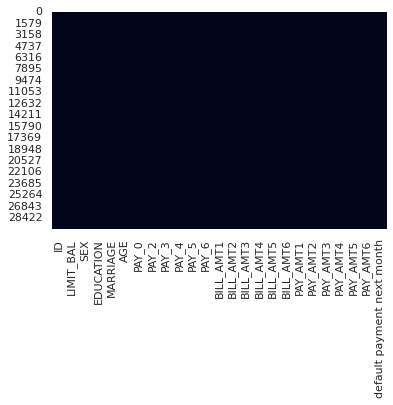

In [ ]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(dataset.isnull(), cbar=False)

### Understanding and Found some information about our dataset

Objective of our project is to predict which customer might default in upcoming months. Before going any fudther let's have a quick look on defination of what actually meant by **Credit Card Default**.

*   We are all aware what is credit card. It is type of payment card in which charges are made against a line of credit instead of the account holder's cash deposits. When someone uses a credit card to make a purchase, that person's account accrues a balance that must be paid off each month.
*   Credit card default happens when you have become severely delinquent on your credit card payments.Missing credit card payments once or twice does not count as a default. A payment default occurs when you fail to pay the Minimum Amount Due on the credit card for a few consecutive months.



The above dataset has 30000 rows and 25 columns. There are no mising values and duplicate values in the dataset.

## **2. Now understanding the variables available in dataset** 

In [ ]:
# Dataset column name
dataset.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [ ]:
# Dataset description
dataset.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


### Attribute Information:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:



*   X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.

*   X2: Gender (1 = male; 2 = female).

*   X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).


*   X4: Marital status (1 = married; 2 = single; 3 = others).


*   X5: Age (year).
*   X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.


*   X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.



*   X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.




### Features Description

We have records of 30001 customers. Below are the description of all features:

*ID: ID of each client*

*LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit)*

*SEX: Gender (1 = male, 2 = female)*

*EDUCATION: (1 = graduate school, 2 = university, 3 = high school, 0,4,5,6 = others)*

*MARRIAGE: Marital status (0 = others, 1 = married, 2 = single, 3 = others)*

*AGE: Age in years*

History of past payment

***We tracked the past monthly payment records from April to September, 2005.The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.***

PAY_0: Repayment status in September, 2005 (scale same as above)

PAY_2: Repayment status in August, 2005 (scale same as above)

PAY_3: Repayment status in July, 2005 (scale same as above)

PAY_4: Repayment status in June, 2005 (scale same as above)

PAY_5: Repayment status in May, 2005 (scale same as above)

PAY_6: Repayment status in April, 2005 (scale same as above)

Amount of bill statement (NT dollar)

BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

Amount of previous payment (NT dollar)

PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

default.payment.next.month: Default payment (1=yes, 0=no)

In our dataset we got customer credit card transaction history for past 6 month , on basis of which we have to predict if cutomer will default or not.


### Checking Unique Values for each variable in dataset

In [ ]:
# For checking unique values in each column
for i in dataset.columns.tolist():
  print('No. of unique values in ',i,'is',dataset[i].nunique())

No. of unique values in  ID is 30000
No. of unique values in  LIMIT_BAL is 81
No. of unique values in  SEX is 2
No. of unique values in  EDUCATION is 7
No. of unique values in  MARRIAGE is 4
No. of unique values in  AGE is 56
No. of unique values in  PAY_0 is 11
No. of unique values in  PAY_2 is 11
No. of unique values in  PAY_3 is 11
No. of unique values in  PAY_4 is 11
No. of unique values in  PAY_5 is 10
No. of unique values in  PAY_6 is 10
No. of unique values in  BILL_AMT1 is 22723
No. of unique values in  BILL_AMT2 is 22346
No. of unique values in  BILL_AMT3 is 22026
No. of unique values in  BILL_AMT4 is 21548
No. of unique values in  BILL_AMT5 is 21010
No. of unique values in  BILL_AMT6 is 20604
No. of unique values in  PAY_AMT1 is 7943
No. of unique values in  PAY_AMT2 is 7899
No. of unique values in  PAY_AMT3 is 7518
No. of unique values in  PAY_AMT4 is 6937
No. of unique values in  PAY_AMT5 is 6897
No. of unique values in  PAY_AMT6 is 6939
No. of unique values in  default pay

## **3. Data Wrangling**

In [ ]:
dataset[dataset['passenger_count']==0].count()

id                    60
vendor_id             60
pickup_datetime       60
dropoff_datetime      60
passenger_count       60
pickup_longitude      60
pickup_latitude       60
dropoff_longitude     60
dropoff_latitude      60
store_and_fwd_flag    60
trip_duration         60
dtype: int64

### Converting datatype

In [ ]:
# Converting timestamp to datetime format to fetch the other details as listed below.
dataset['pickup_datetime'] = pd.to_datetime(dataset['pickup_datetime'])
dataset['dropoff_datetime'] = pd.to_datetime(dataset['dropoff_datetime'])
dataset.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


### Add new columns in dataset

In [ ]:
#Calculate and assign new columns to the dataframe such as weekday,month and pickup_hour which will help us to gain more insights from the data.
dataset['weekday'] = dataset.pickup_datetime.dt.day_name
dataset['month'] = dataset.pickup_datetime.dt.month
dataset['weekday_num'] = dataset.pickup_datetime.dt.weekday
dataset['pickup_hour'] = dataset.pickup_datetime.dt.hour

### Create Functions

In [ ]:
# Create the calc_distance function to calculate distance between pickup and dropoff coordinates using Haversine formula.
def calc_distance(df):
    pickup = (df['pickup_latitude'], df['pickup_longitude'])
    drop = (df['dropoff_latitude'], df['dropoff_longitude'])
    return haversine(pickup, drop)

In [ ]:
# Calculating distance and assign new column to the dataframe with the help of lambda function.
dataset['distance'] = dataset.apply(lambda x: calc_distance(x), axis = 1)

In [ ]:
# Calculating Speed in km/h for further insights.
dataset['speed'] = (dataset.distance/(dataset.trip_duration/3600))

In [ ]:
dataset.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,weekday,month,weekday_num,pickup_hour,distance,speed
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,<bound method PandasDelegate._add_delegate_acc...,3,0,17,1.498523,11.856445
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,<bound method PandasDelegate._add_delegate_acc...,6,6,0,1.805510,9.803672
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,<bound method PandasDelegate._add_delegate_acc...,1,1,11,6.385107,10.822216
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,<bound method PandasDelegate._add_delegate_acc...,4,2,19,1.485500,12.465738
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,<bound method PandasDelegate._add_delegate_acc...,3,5,13,1.188590,9.836608


Now our dataset is complete for the further analysis before we train our model with optimal variables.

## **4. EDA, Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

Changing name of some columns for simplicity and better understanding.

In [4]:
#renaming of columns
dataset.rename(columns={'default payment next month' : 'IsDefaulter'}, inplace=True)
dataset.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
dataset.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
dataset.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'}, inplace = True)

In [ ]:
# View new columns
dataset.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_SEPT',
       'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR', 'BILL_AMT_SEPT',
       'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY',
       'BILL_AMT_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
       'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR', 'IsDefaulter'],
      dtype='object')

### **1. Univariate Analysis**

Univariate analysis explores each variable in a data set, separately. 

Uni means one, so in other words the data has only one variable. Univariate data requires to analyze each variable separately. 

It looks at the range of values, as well as the central tendency of the values. It describes the pattern of response to the variable. It describes each variable on its own.

Now Below is some variables which we doing analysis over them:- 

#### 1. No of Defaulter

Here we analyze Target variable in which their how many defaulter and non defaulter in dataset

In [5]:
#Checking value counts of Defaulter
dataset['IsDefaulter'].value_counts()

0    23364
1     6636
Name: IsDefaulter, dtype: int64

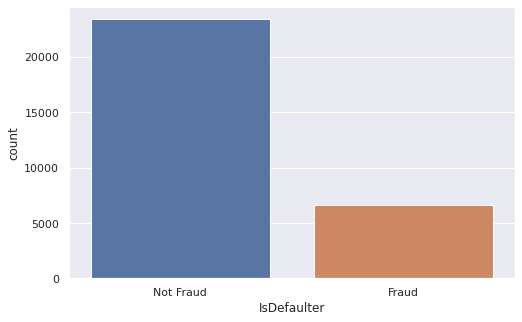

In [6]:
#values count plot of IsDefaulter
plt.figure(figsize=(8,5))
dft=sns.countplot(x = 'IsDefaulter', data = dataset)
dft.set_xticklabels(['Not Fraud','Fraud'])
plt.show()

From Above count plot we can see that, Defaulters is 23364 which are less as compare to the Non-Defaulters which is 6636 in the given dataset.And also we can see that both classes are not in proportion that is we have an imbalanced dataset.

#### 2. Balance limit 

Here we analyze individual and family/supplementary credit limit

In [7]:
#Checking value counts of LIMIT_BAL
dataset['LIMIT_BAL'].value_counts()

50000      3365
20000      1976
30000      1610
80000      1567
200000     1528
           ... 
730000        2
1000000       1
327680        1
760000        1
690000        1
Name: LIMIT_BAL, Length: 81, dtype: int64

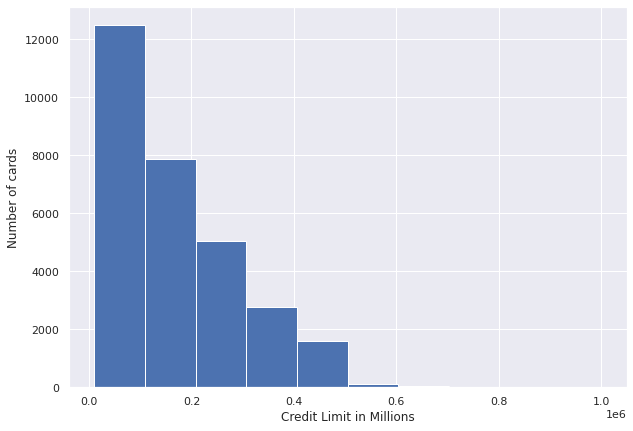

In [8]:
# plotting Distribution of balance limit of card
plt.figure(figsize=(10,7))
plt.hist(dataset["LIMIT_BAL"])
plt.xlabel("Credit Limit in Millions")
plt.ylabel("Number of cards")
plt.show() 

from above histogram we can see that limit balance feature is right skewed, almost 70% of value lie between 10K to 200k.
few of limit goes beyond 500k taiwan dollar

#### 3. Sex

Here we analyze how many credit card consumer according to gender

In [9]:
#Checking value counts of SEX
dataset['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

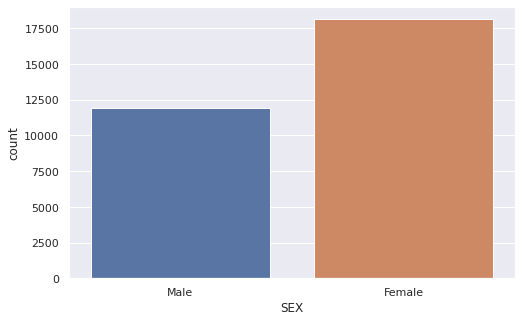

In [10]:
#values count plot of SEX
plt.figure(figsize=(8,5))
dft=sns.countplot(x = 'SEX', data = dataset)
dft.set_xticklabels(['Male','Female'])
plt.show()

From Above count plot we can see that, Female credit card consumer more as compared to male credit card consumer in our dataset.

#### 4. Education

Here we analyze Education qualification of the card holder.

In [11]:
#Checking value counts of Education
dataset['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

From information in our dataset:-

1 = graduate school; 2 = university; 3 = high school; 4 = others

so here 5, 6, 0 are unknown inforamtion so we want to mege it with 4(other) category.

In [12]:
#replacing values with 5, 6 and 0 to Others
dataset.EDUCATION = dataset.EDUCATION.replace({5: "4", 6: "4",0: "4", 4:"4"})


In [13]:
#Checking value counts of EDUCATION
dataset['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

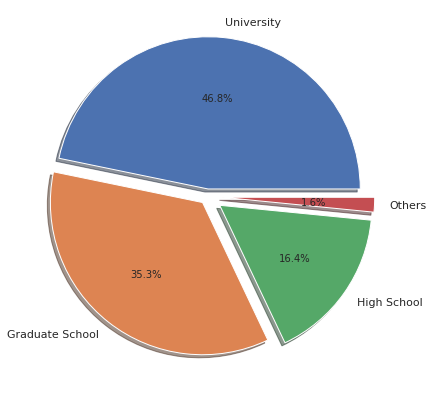

In [14]:
# Pie chart for percentage of EDUCATION
y = dataset['EDUCATION'].value_counts()
plt.figure(figsize=(12,7))
mylabels = ['University', 'Graduate School', 'High School', 'Others']
myexplode = [0.05, 0.05, 0.1, 0.1]
plt.pie(y, labels = mylabels, explode = myexplode, autopct='%1.1f%%',shadow = True)
plt.show() 

From above pie chart we can see that 

*   University and Graduate School has maximum credit card holder which is 46.8 % and 35.3 % respectively.

*   High school have 16.4 % credit card holder and only 1.6 % Other credit card holder



#### 5. Marriage

Here we analyze Marital status of credit card holder

In [15]:
#Checking value counts of MARRIAGE
dataset['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

From information in our dataset:-

Marital status (0 = others, 1 = married, 2 = single, 3 = others)

so here we merge 0 and 3 to the other category.

In [16]:
#replacing values with 0 and 3 to Others
dataset.MARRIAGE = dataset.MARRIAGE.replace({0: "3", 3: "3"})

In [17]:
#Checking value counts of MARRIAGE
dataset['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

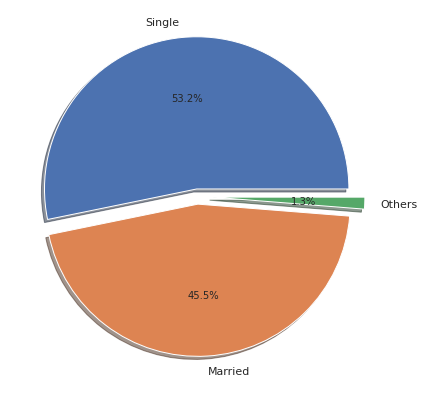

In [18]:
# Pie chart for percentage of Marriage status
y = dataset['MARRIAGE'].value_counts()
plt.figure(figsize=(12,7))
mylabels = ['Single','Married','Others']
myexplode = [0.05, 0.05, 0.1]
plt.pie(y, labels = mylabels, explode = myexplode, autopct='%1.1f%%',shadow = True)
plt.show() 

From above pie chart we can see that:-

*   Number of credit card holder is maximum in singles which is 53.2 %.
*   Number of credit card holder Married is 45.5 %.

*   There are only 1.3 % Other credit card holder which might be chances to divorced or another reason.





#### 6. Age

Here we analyze distribution age of credit card holder.

In [19]:
#Checking value counts of AGE
dataset['AGE'].value_counts()

29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
72       3
75       3
71       3
79       1
74       1
Name: AGE, dtype: int64

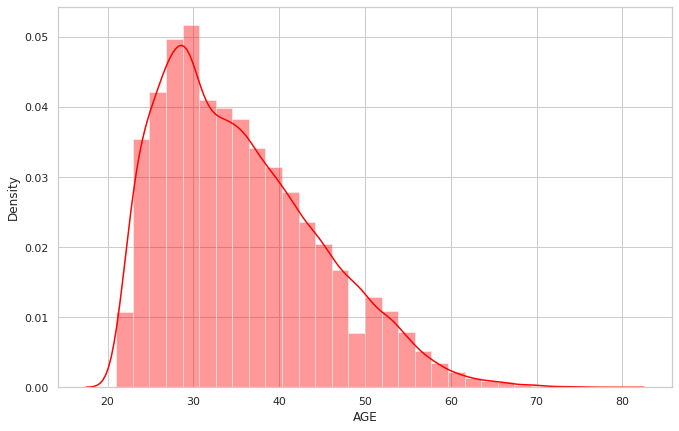

In [20]:
# Distribution of density of age using distplot
sns.set_style('whitegrid')
plt.figure(figsize=(11,7))
sns.distplot(dataset['AGE'], kde = True, color ='red', bins = 30)

From above Distplot we can see that:-

*   Age feature is also right skewed, middle 50% of age is 22 to 42 years which means mostly working class people use credit card.
*   Few people above 60 years of age also uses the credit card.



### **2. Bivariate Analysis**

Bivariate analysis is one of the statistical analysis where two variables are observed. 

One variable here is dependent while the other is independent.

here we analyse the changes occured between the two variables and to what extent.

Now Below is some variables which we doing analysis over them:-

#### 1. Balance Limt VS Defaulter 

Here we analyze that how many defaulter with different range of credit balance limit.

In [21]:
# Creating new column LimitBin with range
dataset['LimitBin'] = pd.cut(dataset['LIMIT_BAL'],[10000, 50000, 100000, 150000, 200000, 300000, 400000, 500000, 1100000])
dataset['LimitBin'].value_counts()

(10000, 50000]       7183
(200000, 300000]     5059
(50000, 100000]      4822
(150000, 200000]     3978
(100000, 150000]     3902
(300000, 400000]     2759
(400000, 500000]     1598
(500000, 1100000]     206
Name: LimitBin, dtype: int64

In [22]:
# Group together IsDefaulter and LimitBin column
dataset['IsDefaulter'].groupby(dataset['LimitBin']).value_counts()

LimitBin           IsDefaulter
(10000, 50000]     0              4940
                   1              2243
(50000, 100000]    0              3578
                   1              1244
(100000, 150000]   0              3077
                   1               825
(150000, 200000]   0              3268
                   1               710
(200000, 300000]   0              4247
                   1               812
(300000, 400000]   0              2371
                   1               388
(400000, 500000]   0              1404
                   1               194
(500000, 1100000]  0               183
                   1                23
Name: IsDefaulter, dtype: int64

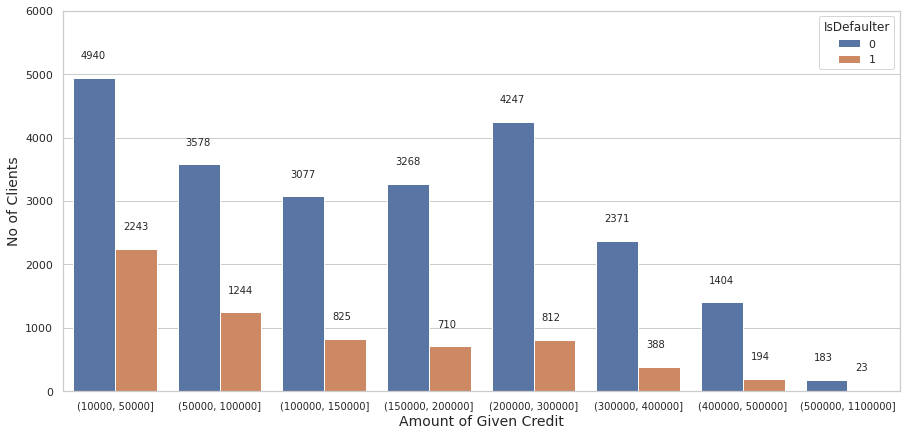

In [23]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data = dataset, x = 'LimitBin', hue="IsDefaulter")

plt.xlabel("Amount of Given Credit", fontsize= 14)
plt.ylabel("No of Defaulters", fontsize= 14)
plt.ylim(0,6000)
ax.tick_params(axis='x', labelsize= 10)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.075, p.get_height()+300))

plt.show()


From above countplot we can see that:-

*   There are almost 60 % which is 3487 defaulter come between 10000 to 100000 Credit card balance limit
*   We also can see that the higher the credit card balance limit, the lower is the chance of defaulting.



In [24]:
# Drop LimitBin column
dataset.drop(['LimitBin'],axis=1)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


#### 2. Sex VS Defaulter

Here we analyze that how many defaulter according to different genders.

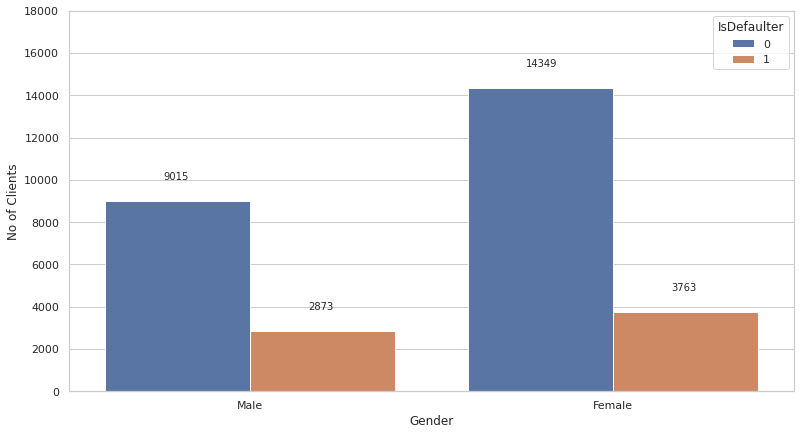

In [25]:
plt.figure(figsize=(13,7))
ax = sns.countplot(data = dataset, x = 'SEX', hue='IsDefaulter')

plt.xlabel('Gender', fontsize= 12)
plt.ylabel("No of Defaulters", fontsize= 12)
plt.ylim(0,18000)
plt.xticks([0,1],['Male', 'Female'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.16, p.get_height()+1000))

plt.show()

From above countplot we can see that:-

*   There are more women than men in our dataset because of this their defaulter value is more which is 3763 and their percentage of dafaulter is 20 %.
*   There are less men compare to women in our dataset because of this their defaulter value is less which is 2873 but their percentage of dafaulter is 24 %.

*   So comparitively men have a slightly higher chance of default.





#### 3. Education VS Defaulter

Here we analyze that how many defaulter according to their Education qualification.

In [ ]:
#Checking value counts of Education
dataset['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

1 = graduate school, 2 = university, 3 = high school, 0,4,5,6 = others

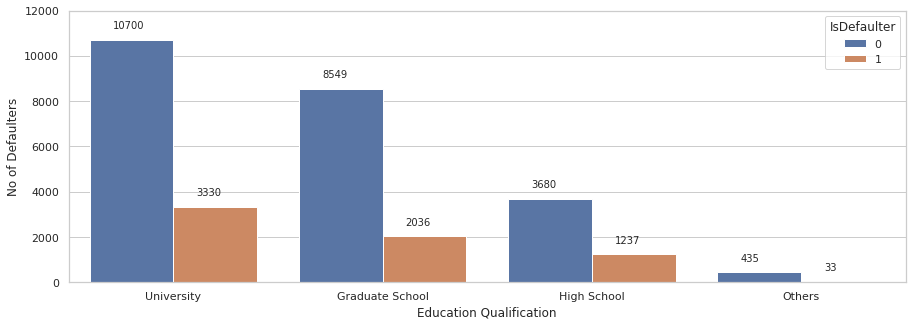

In [40]:
plt.figure(figsize=(15,5))

ax = sns.countplot(data = dataset, x = 'EDUCATION', hue="IsDefaulter")

plt.xlabel("Education Qualification", fontsize= 12)
plt.ylabel("No of Defaulters", fontsize= 12)
plt.ylim(0,12000)
plt.xticks([0,1,2,3],['University','Graduate School','High School','Others'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.11, p.get_height()+500))

plt.show()


From above countplot we can see that:-

*   As the number of university and graduate school credit card holder is higher which is 10700 & 8549. also their credit card default are also higher which is 3330 & 2036.
*   High school have less Credit card holder which is 3680 so their defaulter is less which is 1237. 

*   Other have very less credit card holder which is 435 so their defauler is very less which is 33.





#### 4. Marriage VS Defaulter

Here we analyze that how many defaulter according to their marital status.

In [36]:
dataset['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

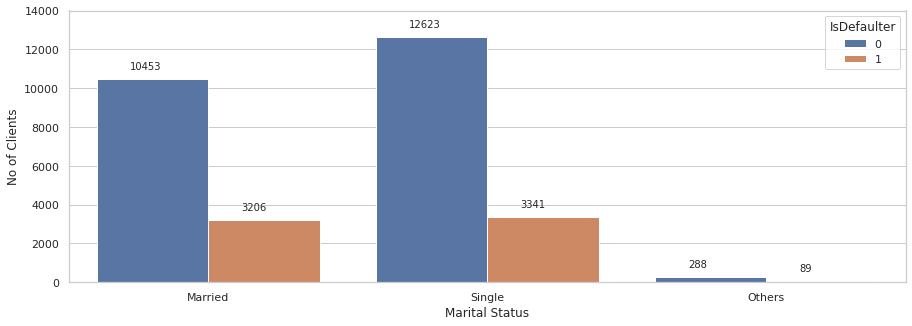

In [39]:
plt.figure(figsize=(15,5))

ax = sns.countplot(data = dataset, x = 'MARRIAGE', hue="IsDefaulter")

plt.xlabel('Marital Status', fontsize= 12)
plt.ylabel("No of Defaulters", fontsize= 12)
plt.ylim(0,14000)
plt.xticks([0,1,2],['Married','Single','Others'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.12, p.get_height()+500))

plt.show()

From above countplot we can see that:-

*   Number of credit card holder is maximum in singles as compare to married which is 12623 in single & 10453 in married but credit card defaulter are almost same in case of single and married people which is 3341 in single & 3206 in married.
*   Other people have less credit card holder so their defaulter is less which is only 89.



#### 5. Age VS Defaulter

Here we analyze that how many defaulter according to different ages of credit card holder.

In [47]:
# Creating new column Age Range with range
dataset['Age Range'] = pd.cut(dataset['AGE'],[20, 25, 30, 35, 40, 50, 60, 80])
dataset['Age Range'].value_counts()

(25, 30]    7142
(40, 50]    6005
(30, 35]    5796
(35, 40]    4917
(20, 25]    3871
(50, 60]    1997
(60, 80]     272
Name: Age Range, dtype: int64

In [48]:
# Group together IsDefaulter and Age Range column
dataset['IsDefaulter'].groupby(dataset['Age Range']).value_counts()

Age Range  IsDefaulter
(20, 25]   0              2839
           1              1032
(25, 30]   0              5703
           1              1439
(30, 35]   0              4670
           1              1126
(35, 40]   0              3854
           1              1063
(40, 50]   0              4606
           1              1399
(50, 60]   0              1493
           1               504
(60, 80]   0               199
           1                73
Name: IsDefaulter, dtype: int64

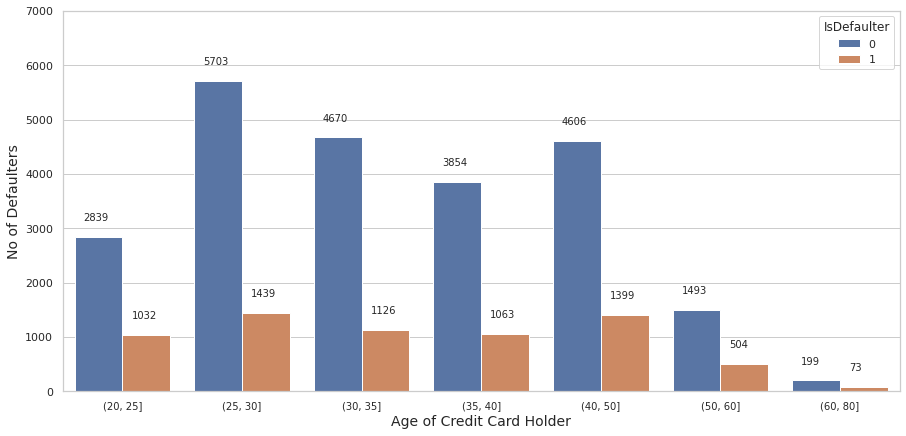

In [50]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data = dataset, x = 'Age Range', hue="IsDefaulter")

plt.xlabel("Age of Credit Card Holder", fontsize= 14)
plt.ylabel("No of Defaulters", fontsize= 14)
plt.ylim(0,7000)
ax.tick_params(axis='x', labelsize= 10)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.075, p.get_height()+300))

plt.show()

From above countplot we can see that:-

*   Most of the defaulter cases happen in 25 to 30 age group which is 1439 dafaulter with 25 % defaulter ratio and 40 to 50 age group which is 1399 dafaulter with 30 % dafaulter ratio.
*   Age group 30 to 40 have 2189 defaulter with 25 % defaulter ratio.

*   Age group(20 to 25 & 50 to 60 & 60 to 80) have less credit card holder and  their defaulter is 1609 but their defaulter ratio is high which is 35 %. 





### **3. Multivariate Analysis**

Multivariate analysis (MVA) involves evaluating multiple variables (more than two) to identify any possible association among them. 



#### 1. Heatmap



What is Heatmap

A heat map is a two-dimensional representation of data in which values are represented by colors. A simple heat map provides an immediate visual summary of information. More elaborate heat maps allow the viewer to understand complex data sets.

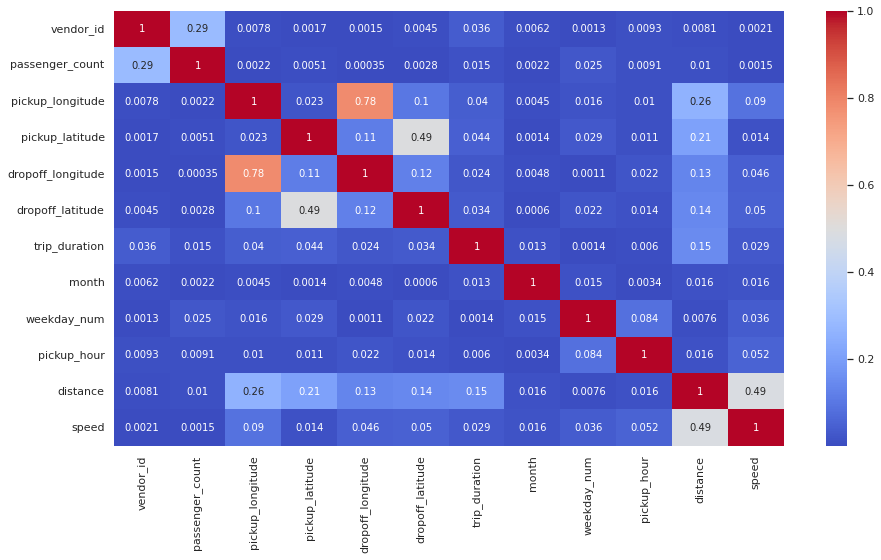

In [ ]:
# Using heatmap
plt.figure(figsize=(15,8))
correlation = dataset.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

From above Heatmap:-

*   There are some maximum multicolinearity between

    1. pickhup longitude and dropoff longitude which is = 0.78
    2. pickhup latitude and dropoff latitude which is = 0.49 
    3. distance and speed which is = 0.49
    4. Some combinations of features shows slight correlation


## **5. Hypothesis Testing**

What is Hypothesis Testing:-

Hypothesis Testing is a type of statistical analysis in which you put your assumptions about a population parameter to the test. the theory, methods, and practice of testing a hypothesis by comparing it with the null hypothesis. The null hypothesis is only rejected if its probability falls below a predetermined significance level, in which case the hypothesis being tested is said to have that level of significance.

Below we creating some function parameter which is usefull in hypothesis testing:-

In [ ]:
# Creating Parameter Class 
class findz:
  def proportion(self,sample,hyp,size):
    return (sample - hyp)/math.sqrt(hyp*(1-hyp)/size)
  def mean(self,hyp,sample,size,std):
    return (sample - hyp)*math.sqrt(size)/std
  def varience(self,hyp,sample,size):
    return (size-1)*sample/hyp

variance = lambda x : sum([(i - np.mean(x))**2 for i in x])/(len(x)-1)
zcdf = lambda x: norm(0,1).cdf(x)
# Creating a function for getting P value
def p_value(z,tailed,t,hypothesis_number,df,col):
  if t!="true":
    z=zcdf(z)
    if tailed=='l':
      return z
    elif tailed == 'r':
      return 1-z
    elif tailed == 'd':
      if z>0.5:
        return 2*(1-z)
      else:
        return 2*z
    else:
      return np.nan
  else:
    z,p_value=stats.ttest_1samp(df[col],hypothesis_number)
    return p_value
    
  


# Conclusion about the P - Value
def conclusion(p):
  significance_level = 0.05
  if p>significance_level:
    return f"Failed to reject the Null Hypothesis for p = {p}."
  else:
    return f"Null Hypothesis rejected Successfully for p = {p}"

# Initializing the class
findz = findz()

### Hypothesis testing - 1

Average trip duration is 1000 seconds for vendor id 1

#### 1. null hypothesis and alternate hypothesis.

Null Hypothesis : N = 1000

Alternate Hypothesis : N < 1000

Test Type : Left Tailed Test

#### 2. Performing statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
hypo_2=dataset[(dataset["trip_duration"]==1000)]
# Getting the required parameter values for hypothesis testing
hypothesis_number = 2
sample_mean = hypo_2["trip_duration"].mean()
size = len(hypo_2)
std=(variance(hypo_2["trip_duration"]))**0.5

In [ ]:
# Getting Z value
z = findz.mean(hypothesis_number,sample_mean,size,std)
# Getting P - Value
p = p_value(z=z,tailed='r',t="1000",hypothesis_number=hypothesis_number,df=hypo_2,col="trip_duration")
# Getting Conclusion
print(conclusion(p))

Null Hypothesis rejected Successfully for p = 0.0


I have used t-Test as the statistical testing to obtain P-Value and found the result that Null hypothesis has been rejected.

we got probability of 0.0 so vendor id have not average trip duration of 1000 seconds thats why we reject them

In [ ]:
mean_median_difference=hypo_2["trip_duration"].mean()- hypo_2["trip_duration"].median()
print("Mean Median Difference is :-",mean_median_difference)

Mean Median Difference is :- 0.0


also there are big difference between mean and median

#### 3. Why did we choose the specific statistical test?

NameError: ignored

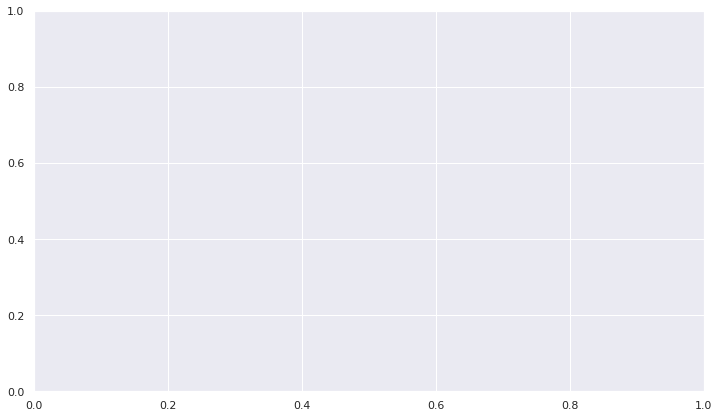

In [ ]:
fig=plt.figure(figsize=(12,7))
ax=fig.gca()
feature= (hypo_2["trip_duration"])
sns.distplot(hypo_2["trip_duration"])
ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
ax.set_title('col')
plt.show()

From the above chart we can see median is greater than mean over -173.079. So, the distribution is rightly skewed. For a skewed data Z-Test can't be performed.

Non-parametric tests are most useful for small studies. Using non-parametric tests in large studies may provide answers to the wrong question, thus confusing readers. For studies with a large sample size, t-tests and their corresponding confidence intervals can and should be used even for heavily skewed data.

So, for a skewed data we can use T-test for better result. Thus, I used t - test.

### 2. Hypithesis Testing - 2

#### 1. null hypothesis and alternate hypothesis.

Null Hypothesis : N = 3 (Wednesday)

Alternate Hypothesis : N !=3

Test Type : right Tailed Test

In [ ]:
# Perform Statistical Test to obtain P-Value
hypo_1=dataset[(dataset.mean())]
# Getting the required parameter values for hypothesis testing
hypothesis_number = 2
sample_mean = hypo_1["weekday_num"].mean()
size = len(hypo_1)
std=(variance(hypo_1["weekday_num"]))**0.5

In [ ]:
# Getting Z value
z = findz.mean(hypothesis_number,sample_mean,size,std)
# Getting P - Value
p = p_value(z=z,tailed='r',t="3",hypothesis_number=hypothesis_number,df=hypo_2,col="weekday_num")
# Getting Conclusion
print(conclusion(p))

Null Hypothesis rejected Successfully for p = 0.0


In [ ]:
sample_mean

3.1666666666666665

## **6. Feature Engineering & Data Pre-processing**

Feature engineering is the pre-processing step of machine learning, which is used to transform raw data into features that can be used for creating a predictive model using Machine learning or statistical Modelling. Feature engineering in machine learning aims to improve the performance of models.

Since our dataset do not contain very large number of dimensions. We will first try to use feature selection instead of the feature extraction technique.

### 1. Difference between Feature selection and Feature extraction

**Feature selection:-**

Feature Selection on the other hand is a machine learning technique applied on these (numerical) features.

we select a subset of the original feature set based on the statistical significance of different parameters.

Example: Backward elimination, Forward selection, Recursive feature elimination

**Feature extraction:-**

Feature Extraction transforms an arbitrary data, such as text or images, into numerical features that is understood by machine learning algorithms.

we build a new set of features from the original feature set.

Example: PCA, LDA, Kernel PCA

### 2. Feature selection

Intuition:-

*   We will use backward elimination technique to select the best features to train our model.

*   It displays some statistical metrics with there significance value.

*   Like, It shows the p values for each feature as per its significance in the whole dataset.
*   It also shows the adjusted R squared values to identify whether removing or selecting the feature is beneficial or not.


*   For now we will only look at the P and adjusted R squared value to decide which features to keep and which needed to be removed.





#### 1. Creating dummy variable

what is dummy variable:-

It is an arbitrary mathematical symbol or variable that can be replaced by another without affecting the value of the expression in which it occurs.

It is a numerical variable used in regression analysis to represent subgroups of the sample in your study.

In regression analysis, a dummy variable (also known as indicator variable or just dummy) is one that takes the values 0 or 1 to indicate the absence or presence of some categorical effect that may be expected to shift the outcome.

In [ ]:
#firstly we do the Dummify all the categorical features like "store_and_fwd_flag, vendor_id, month, weekday_num, pickup_hour, passenger_count" except the label i.e. "trip_duration"

dummy = pd.get_dummies(dataset.store_and_fwd_flag, prefix='flag')
#avoid dummy trap
dummy.drop(dummy.columns[0], axis=1, inplace=True) 
dataset = pd.concat([dataset,dummy], axis = 1)

dummy = pd.get_dummies(dataset.vendor_id, prefix='vendor_id')
#avoid dummy trap
dummy.drop(dummy.columns[0], axis=1, inplace=True) 
dataset = pd.concat([dataset,dummy], axis = 1)

dummy = pd.get_dummies(dataset.month, prefix='month')
#avoid dummy trap
dummy.drop(dummy.columns[0], axis=1, inplace=True) 
dataset = pd.concat([dataset,dummy], axis = 1)

dummy = pd.get_dummies(dataset.weekday_num, prefix='weekday_num')
#avoid dummy trap
dummy.drop(dummy.columns[0], axis=1, inplace=True) 
dataset = pd.concat([dataset,dummy], axis = 1)

dummy = pd.get_dummies(dataset.pickup_hour, prefix='pickup_hour')
#avoid dummy trap
dummy.drop(dummy.columns[0], axis=1, inplace=True) 
dataset = pd.concat([dataset,dummy], axis = 1)

dummy = pd.get_dummies(dataset.passenger_count, prefix='passenger_count')
#avoid dummy trap
dummy.drop(dummy.columns[0], axis=1, inplace=True) 
dataset = pd.concat([dataset,dummy], axis = 1)

In [ ]:
dataset.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_hour_19,pickup_hour_20,pickup_hour_21,pickup_hour_22,pickup_hour_23,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,0,0,0,0,0,0,0,0,0,0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,0,0,0,0,0,0,0,0,0,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,0,0,0,0,0,0,0,0,0,0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,1,0,0,0,0,0,0,0,0,0
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,0,0,0,0,0,0,0,0,0,0


#### 2. Let's assign the values to X & Y array from the dataset.

In [ ]:
# Creating a copy of the dataset for further feature engineering
df=dataset.copy()

In [ ]:
#First check the index of the features and label
list(zip( range(0,len(df.columns)),df.columns))

[(0, 'id'),
 (1, 'vendor_id'),
 (2, 'pickup_datetime'),
 (3, 'dropoff_datetime'),
 (4, 'passenger_count'),
 (5, 'pickup_longitude'),
 (6, 'pickup_latitude'),
 (7, 'dropoff_longitude'),
 (8, 'dropoff_latitude'),
 (9, 'store_and_fwd_flag'),
 (10, 'trip_duration'),
 (11, 'weekday'),
 (12, 'month'),
 (13, 'weekday_num'),
 (14, 'pickup_hour'),
 (15, 'distance'),
 (16, 'speed'),
 (17, 'flag_Y'),
 (18, 'vendor_id_2'),
 (19, 'month_2'),
 (20, 'month_3'),
 (21, 'month_4'),
 (22, 'month_5'),
 (23, 'month_6'),
 (24, 'weekday_num_1'),
 (25, 'weekday_num_2'),
 (26, 'weekday_num_3'),
 (27, 'weekday_num_4'),
 (28, 'weekday_num_5'),
 (29, 'weekday_num_6'),
 (30, 'pickup_hour_1'),
 (31, 'pickup_hour_2'),
 (32, 'pickup_hour_3'),
 (33, 'pickup_hour_4'),
 (34, 'pickup_hour_5'),
 (35, 'pickup_hour_6'),
 (36, 'pickup_hour_7'),
 (37, 'pickup_hour_8'),
 (38, 'pickup_hour_9'),
 (39, 'pickup_hour_10'),
 (40, 'pickup_hour_11'),
 (41, 'pickup_hour_12'),
 (42, 'pickup_hour_13'),
 (43, 'pickup_hour_14'),
 (44, 'pic

In [ ]:
Y = df.iloc[:,10].values

X = df.iloc[:,range(15,58)].values

Now question is why few features are not assigned to the X array like features at the index 2,3,10 were missed?

Lets assume that:-

*   duration variable assigned to Y because that is the dependent variable.
*   features such as id, timestamp and weekday were not assigned to X array because they are of type object. And we need an array of float data type.

Trick for backward elimination:-

General equation for multiple linear regression is like

        Y = a0 + a1x1 + a2x2 + ... + anxn


Since, we dont have x0 in our X array so the regressor won't consider the constant value of the equation i.e. a0. So to make it count in the equation we will append the selected feature set with a contant series of 1's as a first column. To make it appear like below equation to the statsmodel.

        y = a0x0 + a1x1 + a2x2 + ... + anxn

In [ ]:
X.shape

(1458635, 43)

In [ ]:
# Let's append 1458644 rows of 1's as the first column in the X array
X1 = np.append(arr = np.ones((X.shape[0],1)).astype(int), values = X, axis = 1)
X1.shape

(1458635, 44)

There we go, our feature set is now ready for the feature selection model with 1s in the first column for a0 constant.

Let's fit stats model on the X array to figure out an optimal set of features by recursively checking for the highest p value and removing the feature of that index.

Here we will take the level of significance as 0.05 i.e. 5% which means that we will reject feature from the list of array and re-run the model till p value for all the features goes below .05 to find out the optimal combination for our model.



In [ ]:
#Select all the features in X array
X_opt = X1[:,range(0,43)]
regressor_OLS = sm.OLS(endog = Y, exog = X_opt).fit()

#Fetch p values for each feature
p_Vals = regressor_OLS.pvalues

#define significance level for accepting the feature.
sig_Level = 0.05

#Loop to iterate over features and remove the feature with p value less than the sig_level
while max(p_Vals) > sig_Level:
    print("Probability values of each feature \n")
    print(p_Vals)
    X_opt = np.delete(X_opt, np.argmax(p_Vals), axis = 1)
    print("\n")
    print("Feature at index {} is removed \n".format(str(np.argmax(p_Vals))))
    print(str(X_opt.shape[1]-1) + " dimensions remaining now... \n")
    regressor_OLS = sm.OLS(endog = Y, exog = X_opt).fit()
    p_Vals = regressor_OLS.pvalues
    print("=================================================================\n")
    
#Print final summary
print("Final stat summary with optimal {} features".format(str(X_opt.shape[1]-1)))
regressor_OLS.summary()

Probability values of each feature 

[1.14235681e-222 0.00000000e+000 0.00000000e+000 5.88156519e-001
 0.00000000e+000 9.56213550e-001 2.63751178e-002 3.42026733e-005
 9.99469652e-011 1.55504273e-014 4.59060331e-010 1.04427394e-012
 1.17022231e-019 9.97185726e-019 7.75436166e-009 1.07427525e-001
 8.65902188e-002 2.31521890e-002 5.61089239e-002 6.19370838e-001
 2.43880845e-004 8.44959306e-007 1.42342868e-001 9.82984453e-003
 5.75748996e-004 2.75591522e-003 2.21094457e-004 2.61652781e-007
 1.58508590e-009 6.02827787e-012 7.39568711e-020 2.68426364e-011
 3.58834609e-008 1.18786156e-006 2.84512724e-001 9.12279021e-001
 7.71221300e-001 2.17319034e-002 8.39782697e-001 3.29648051e-001
 2.07563844e-003 2.95475527e-003 2.26405118e-001]


Feature at index 5 is removed 

41 dimensions remaining now... 


Probability values of each feature 

[1.07590743e-241 0.00000000e+000 0.00000000e+000 5.88110641e-001
 0.00000000e+000 8.54991122e-003 1.12226800e-006 3.59174105e-014
 3.70410403e-019 4.52832745e

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     1821.
Date:                Fri, 13 Jan 2023   Prob (F-statistic):               0.00
Time:                        15:49:44   Log-Likelihood:            -1.3801e+07
No. Observations:             1458635   AIC:                         2.760e+07
Df Residuals:                 1458602   BIC:                         2.760e+07
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        556.0497      8.726     63.726      0.000     538.948     573.152
x1           159.2291      0.687    231.866      0.000     157.883     160.575
x2           -27.5755      0.199   -138.378      0.000     -27.966     -27.185
x3           217.7853      5.167     42.147      0.000     207.658     227.913
x4            20.1427      7.652      2.632      0.008       5.145      35.141
x5            37.4817      7.694      4.872      0.000      22.403      52.561
x6            58.5913      7.729      7.581      0.000      43.443      73.739
x7            70.4444      7.883      8.937      0.000      54.995      85.894
x8            53.7050      8.588      6.254      0.000      36.873      70.537
x9            62.0244      8.495      7.301      0.000      45.375      78.674
x10           80.4470      8.389      9.590      0.000      64.006      96.888
x11           77.8486      8.310      9.369      0.000      61.562      94.135
x12           48.5033      8.335      5.819      0.000      32.167      64.840
x13           34.7270     16.628      2.089      0.037       2.138      67.316
x14           51.5747     19.296      2.673      0.008      13.756      89.393
x15           48.1076     22.132      2.174      0.030       4.730      91.485
x16         -108.8620     25.913     -4.201      0.000    -159.651     -58.073
x17         -111.5300     17.792     -6.269      0.000    -146.402     -76.658
x18          -31.8065     14.109     -2.254      0.024     -59.460      -4.153
x19           43.1283     13.013      3.314      0.001      17.623      68.634
x20           58.8741     12.954      4.545      0.000      33.484      84.264
x21           51.5821     13.135      3.927      0.000      25.839      77.325
x22           63.8601     12.885      4.956      0.000      38.607      89.114
x23           89.1670     12.624      7.063      0.000      64.424     113.910
x24          105.1088     12.652      8.307      0.000      80.311     129.907
x25          119.1736     12.451      9.571      0.000      94.770     143.577
x26          160.0336     12.632     12.669      0.000     135.275     184.793
x27          119.0815     13.237      8.996      0.000      93.137     145.026
x28           94.2838     12.298      7.667      0.000      70.180     118.388
x29           79.8803     11.466      6.967      0.000      57.408     102.352
x30           37.2396     12.023      3.097      0.002      13.675      60.804
x31           38.3855     12.997      2.953      0.003      12.911      63.860
x32           53.8110     18.653      2.885      0.004      17.251      90.371
==============================================================================
Omnibus:                  3577886.836   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      32816352856.468
Sk

From above:-



*   we finally reached the combination of optimum features with each feature having p value < 0.05.



#### 3. Split Data

So here we divide our data in two divison:-

1. train split
2. test split

The train-test split is used to estimate the performance of machine learning algorithms that are applicable for prediction-based Algorithms/Applications. This method is a fast and easy procedure to perform such that we can compare our own machine learning model results to machine results.

Before training our model on the dataset, we need to split the dataset into training and testing datasets. This is required to train our model on the major part of our dataset and test the accuracy of the model on the minor part. Let's split it.

In [ ]:
#Split raw data
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=4)

#Split data from the feature selection group
X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(X_opt,Y, test_size=0.2, random_state=4)

From above train test split:-


*   This will divide our dataset randomly with a ratio of 80/20 where training set consists of more than 1 million records and test dataset with more than .35 million records. Let's train our model on the training set now.



### 3. Feature Extraction

We will use PCA for feature extraction i.e. Principal Component Analysis. It is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components.

#### 1. Split Data

In [ ]:
# Lets split our data first before scaling the features
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X,Y,test_size=0.2, random_state=4)

#### 2. Scale Data

So here we scale the input varibles first before applying PCA to standardise the variance and avoid the bias. Lets Scale the data using StandardScaler.

Why we use scaler:-

So if the data in any conditions has data points far from each other, scaling is a technique to make them closer to each other or in simpler words, we can say that the scaling is used for making data points generalized so that the distance between them will be lower.

In [ ]:
# Applying Standard scaler
scaler = StandardScaler()
X_train_pca = scaler.fit_transform(X_train_pca)
X_test_pca = scaler.transform(X_test_pca)

#### 3. PCA Application

Let's apply PCA technique on the training features to understand how many principal components should we select for our model to capture atleast 90% variance. For that we will take help of plot and cumsum function of numpy package.

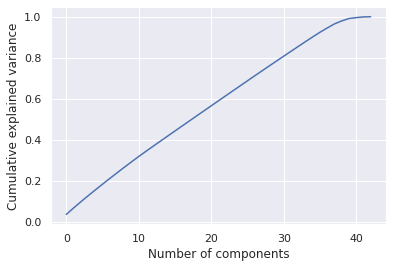

In [ ]:
pca = PCA().fit(X_train_pca)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.show()

In [ ]:
arr = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
list(zip(range(1,len(arr)), arr))

[(1, 3.65),
 (2, 6.77),
 (3, 9.78),
 (4, 12.709999999999999),
 (5, 15.569999999999999),
 (6, 18.389999999999997),
 (7, 21.179999999999996),
 (8, 23.909999999999997),
 (9, 26.629999999999995),
 (10, 29.279999999999994),
 (11, 31.909999999999993),
 (12, 34.449999999999996),
 (13, 36.92999999999999),
 (14, 39.40999999999999),
 (15, 41.87999999999999),
 (16, 44.34999999999999),
 (17, 46.80999999999999),
 (18, 49.25999999999999),
 (19, 51.709999999999994),
 (20, 54.16),
 (21, 56.61),
 (22, 59.05),
 (23, 61.489999999999995),
 (24, 63.92999999999999),
 (25, 66.35999999999999),
 (26, 68.78999999999999),
 (27, 71.21),
 (28, 73.61999999999999),
 (29, 76.02),
 (30, 78.39999999999999),
 (31, 80.77999999999999),
 (32, 83.14999999999999),
 (33, 85.50999999999999),
 (34, 87.85999999999999),
 (35, 90.16999999999999),
 (36, 92.41999999999999),
 (37, 94.51999999999998),
 (38, 96.49999999999999),
 (39, 97.94999999999999),
 (40, 99.11999999999999),
 (41, 99.55999999999999),
 (42, 99.90999999999998)]

From above we can see that almost 40 variables are needed for capturing atleast 99% of the variance in the training dataset. Hence we will use the same set of variables.

In [ ]:
# Apply PCA on the training and the test dataset
pca_10 = PCA(n_components=40)
X_train_pca = pca_10.fit_transform(X_train_pca)
X_test_pca = pca_10.transform(X_test_pca)

#### 4. Correlation of Feature extraction

Lets analyze Correlation between features of the Feature extraction using Heatmap

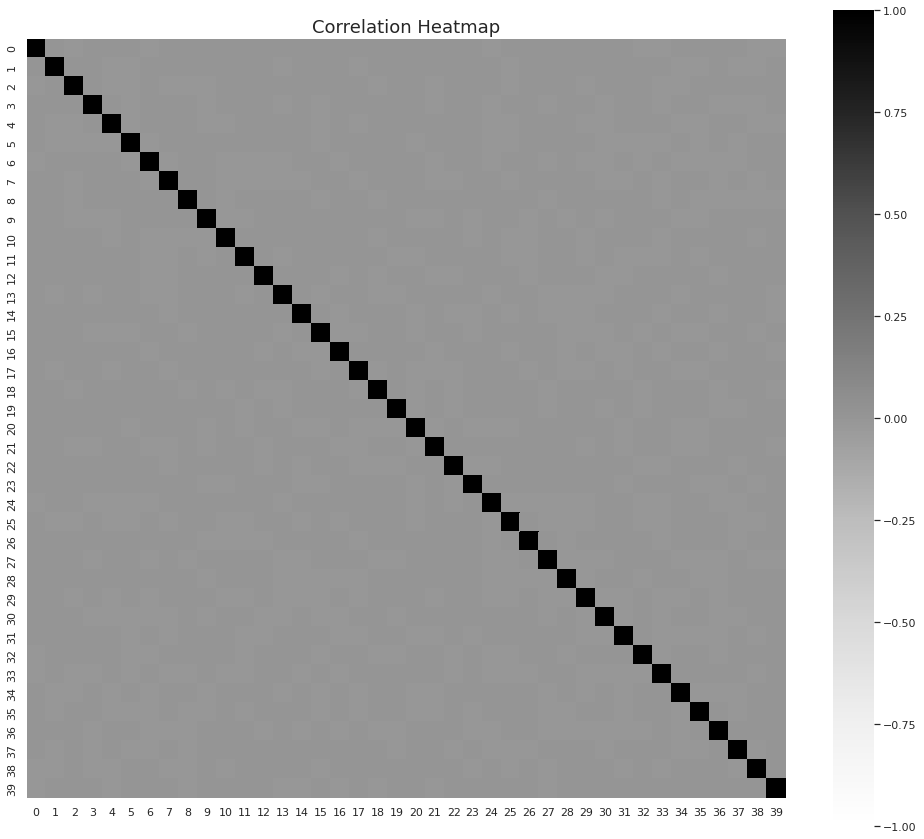

In [ ]:
plt.figure(figsize=(17,15))
corr = pd.DataFrame(X_train_pca).corr()
corr.index = pd.DataFrame(X_train_pca).columns
sns.heatmap(corr, cmap='Greys',square=True, vmin=-1, vmax=1)
plt.title("Correlation Heatmap", fontsize=18)
plt.show()

From above heatmap:-


*   All of the features shows NO correlation at all. Because feature extraction removes all collinearity.

Let's move on to the  ML Model implementation.




## **7. ML Model Implementation**

What is model in machine learning:-

*   A machine learning model is a file that has been trained to recognize certain types of patterns. You train a model over a set of data, providing it an algorithm that it can use to reason over and learn from those data.

*   We need a model to train on our dataset to serve our purpose of prediciting the NYC taxi trip duration given the other features as training and test set. Since our dependent variable contains continous values so we will use regression technique to predict our output.





### ML Model 1 - **Multiple Linear Regression**


Why we use Multiple Linear Regression:-

*   It is used to estimate the relationship between one continuous dependent variable and two or more independent variables.

Model training:-


*   We will first try with the default instantiation of the regressor object without using any generalization parameter. We will also not perform any scaling of the features because linear regression model takes care of that inherently. This is a plus point to use Linear regression model.
*   It is quite fast to train even on very large datasets. So considering the size of our dataset this seems to be the correct approach as of now. Let's see how it performs.

#### Model fitting

In [ ]:
# Linear regressor for the raw data
# Instance the linear regression object
regressor = LinearRegression()          
# Fit the Algorithm
regressor.fit(X_train,y_train) 

LinearRegression()

In [ ]:
# Linear regressor for the Feature selection group
# Instance the linear regression object
regressor1 = LinearRegression()
# Fit the Algorithm         
regressor1.fit(X_train_fs,y_train_fs)   

LinearRegression()

In [ ]:
# Linear regressor for the Feature extraction group
# Instance the linear regression object
regressor2 = LinearRegression()
# Fit the Algorithm 
regressor2.fit(X_train_pca,y_train_pca) 

LinearRegression()

#### Coefficients

In [ ]:
# Checking the coefficients
regressor.coef_

array([ 159.82360985,  -25.6809764 ,   -1.25237458,  197.92702507,
          2.03395675,    6.78508698,   14.491143  ,   33.7882219 ,
         49.12250795,   89.77983872,   75.91219962,   90.38956012,
         90.95153571,   78.06458175,   15.14715523,  -12.15059102,
          1.45660736,    0.77748735,  -55.03095489, -169.27876311,
        -71.96748448,  -63.05852868,   25.59437525,   23.58929909,
         34.07397978,   37.81919844,   74.18932537,   84.55429497,
        101.95394287,  125.79179345,   91.45001386,   59.27093534,
         54.50767803,  -17.61881576,  -44.76149176,  -40.88265108,
         55.11044446,  -43.68676133,  -37.20802121,  -35.50350971,
         -2.63529145,   20.9579909 ,  -16.59891245])

In [ ]:
# Checking the coefficients
regressor1.coef_

array([   0.        ,  159.82022606,  -25.79146244,  203.2850168 ,
         27.57165152,   42.61153152,   84.85181801,   70.54621058,
         84.59348128,   83.86723346,   69.5201848 , -201.72379933,
       -106.15473205,  -97.71548551,   51.76930505,   69.15611377,
         92.79819803,   58.61997937,  -50.77390978,  -77.63340413,
        -73.7156404 ,   22.5425793 ,  -75.82997649])

In [ ]:
# Checking the coefficients
regressor2.coef_

array([ 5.83654146e+01,  1.36288794e+02,  8.83724038e+01,  9.22772731e+00,
        2.74283659e+01, -1.00120746e+01, -2.06216886e+01, -2.28252453e+01,
       -1.14879251e+01,  1.68586878e+01,  1.55340521e+00,  1.65671758e+00,
       -1.99653695e+01, -3.20507604e+01, -1.49009743e+01, -6.33155430e+00,
        5.30903595e+01,  1.81646364e+01,  4.51026558e+01,  2.00990333e+01,
       -2.76151880e+00,  1.13668605e+01, -3.89759055e+00,  1.77933028e+00,
       -4.90065310e+00,  1.10504702e+00, -2.53084274e+01,  5.49773320e+01,
       -1.15617302e+01, -5.47622068e+00, -5.21901021e-01,  5.84825665e+01,
       -1.15157070e+01, -3.34867890e+00,  4.85033043e+01,  1.64020730e+02,
       -2.86051618e+01, -8.24301438e+01, -7.62211290e+02,  2.46146082e+00])

#### Intercept

In [ ]:
# Checking the intercept value
regressor.intercept_

599.859663027474

In [ ]:
# Checking the intercept value
regressor1.intercept_

612.1778015788686

In [ ]:
# Checking the intercept value
regressor2.intercept_

958.9814373797575

#### Prediction

##### 1. Raw data

In [ ]:
# Predict on the model train features of raw data
y_pred1 = regressor.predict(X_train)
y_pred1

array([ 466.61999892,  930.45587793, -116.69555234, ..., 1926.31949792,
       1818.360412  , 1038.75144032])

In [ ]:
# Predict on the model test features of raw data
y_pred = regressor.predict(X_test)
y_pred


array([ 611.65797082,  464.11619884,  837.5052028 , ...,  728.79841811,
       1410.50971786, 1178.95802688])

##### 2. Feature selection

In [ ]:
# Predict on the model train features of Feature Selection group
y_pred_fs1 = regressor1.predict(X_train_fs)
y_pred_fs1

array([ 459.76715526,  946.34593782, -132.8365256 , ..., 1914.76979943,
       1798.063359  , 1031.63803792])

In [ ]:
# Predict on the model test features of Feature Selection group
y_pred_fs = regressor1.predict(X_test_fs)
y_pred_fs

array([ 619.23424024,  465.12334846,  775.84635563, ...,  702.19368651,
       1382.18330377, 1194.68847575])

##### 3. Feature extraction

In [ ]:
# Predict on the model train features of Feature Extraction group
y_pred_pca1 = regressor2.predict(X_train_pca)
y_pred_pca1

array([ 454.36366587,  925.33226493, -129.03860446, ..., 1912.26184157,
       1814.36521652, 1027.56688298])

In [ ]:
# Predict on the model test features of Feature Extraction group
y_pred_pca = regressor2.predict(X_test_pca)
y_pred_pca

array([ 603.37020552,  454.49499903,  898.23260146, ...,  717.45622849,
       1378.80484415, 1174.32826156])

#### Evaluation metrics

##### 1. Raw data

In [ ]:
# Evaluation matrix for train raw data
MSE=round(mean_squared_error(y_train,y_pred1),4)
RMSE=(np.sqrt(MSE))
R2=(r2_score(y_train,y_pred1))
Adjusted_R2=(1-(1-r2_score(y_train, y_pred1))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))
print("MSE :",MSE,"RMSE :", RMSE)
print("R2 :",R2,"Adjusted R2 :",Adjusted_R2)

MSE : 27718783.4647 RMSE : 5264.863100280956
R2 : 0.014048206581480427 Adjusted R2 : 0.014011873578846035


In [ ]:
# Evaluation matrix for test raw data
MSE=round(mean_squared_error(y_test,y_pred),4)
RMSE=(np.sqrt(MSE))
R2=(r2_score(y_test,y_pred))
Adjusted_R2=(1-(1-r2_score(y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("MSE :",MSE,"RMSE :", RMSE)
print("R2 :",R2,"Adjusted R2 :",Adjusted_R2)

MSE : 24236941.1676 RMSE : 4923.1027988048345
R2 : 0.018685127944241153 Adjusted R2 : 0.018540463187745493


##### 2. Feature selection

In [ ]:
# Evaluation matrix for train feature selection group
MSE=round(mean_squared_error(y_train_fs,y_pred_fs1),4)
RMSE=(np.sqrt(MSE))
R2=(r2_score(y_train_fs,y_pred_fs1))
Adjusted_R2=(1-(1-r2_score(y_train_fs, y_pred_fs1))*((X_train_fs.shape[0]-1)/(X_train_fs.shape[0]-X_train_fs.shape[1]-1)))
print("MSE :",MSE,"RMSE :", RMSE)
print("R2 :",R2,"Adjusted R2 :",Adjusted_R2)


MSE : 27719319.3927 RMSE : 5264.91399670498
R2 : 0.01402914372798214 Adjusted R2 : 0.014009709753691202


In [ ]:
# Evaluation matrix for test feature selection group
MSE=round(mean_squared_error(y_test_fs,y_pred_fs),4)
RMSE=(np.sqrt(MSE))
R2=(r2_score(y_test_fs,y_pred_fs))
Adjusted_R2=(1-(1-r2_score(y_test_fs, y_pred_fs))*((X_test_fs.shape[0]-1)/(X_test_fs.shape[0]-X_test_fs.shape[1]-1)))
print("MSE :",MSE,"RMSE :", RMSE)
print("R2 :",R2,"Adjusted R2 :",Adjusted_R2)



MSE : 24236180.7605 RMSE : 4923.0255697589055
R2 : 0.018715915606665745 Adjusted R2 : 0.018638544516211275


##### 3. Feature extraction

In [ ]:
# Evaluation matrix for train feature extraction group
MSE=round(mean_squared_error(y_train_pca,y_pred_pca1),4)
RMSE=(np.sqrt(MSE))
R2=(r2_score(y_train_pca,y_pred_pca1))
Adjusted_R2=(1-(1-r2_score(y_train_pca, y_pred_pca1))*((X_train_pca.shape[0]-1)/(X_train_pca.shape[0]-X_train_pca.shape[1]-1)))
print("MSE :",MSE,"RMSE :", RMSE)
print("R2 :",R2,"Adjusted R2 :",Adjusted_R2)


MSE : 27719382.233 RMSE : 5264.919964538873
R2 : 0.01402690851126387 Adjusted R2 : 0.013993109726082587


In [ ]:
# Evaluation matrix for test feature extraction group
MSE=round(mean_squared_error(y_test_pca,y_pred_pca),4)
RMSE=(np.sqrt(MSE))
R2=(r2_score(y_test_pca,y_pred_pca))
Adjusted_R2=(1-(1-r2_score(y_test_pca, y_pred_pca))*((X_test_pca.shape[0]-1)/(X_test_pca.shape[0]-X_test_pca.shape[1]-1)))
print("MSE :",MSE,"RMSE :", RMSE)
print("R2 :",R2,"Adjusted R2 :",Adjusted_R2)


MSE : 24237191.2669 RMSE : 4923.128199315959
R2 : 0.018675001822247683 Adjusted R2 : 0.0185404299511831


#### Visualizing evaluation Metric Score chart

##### 1. Raw data

Text(0.5, 1.0, 'Actual and Predicted Time Duration')

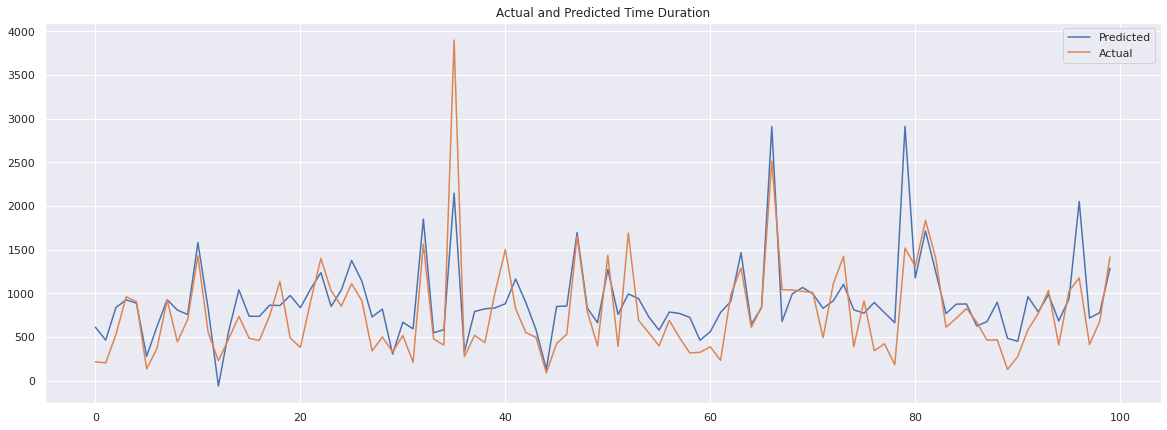

In [ ]:
# Plotting Actual and Predicted Values for test raw data
plt.figure(figsize=(20,7))
plt.plot((y_pred)[:100]) 
plt.plot((np.array(y_test)[:100]))
plt.legend(["Predicted","Actual"])
plt.title('Actual and Predicted Time Duration')

##### 2. Feature selection

Text(0.5, 1.0, 'Actual and Predicted Time Duration')

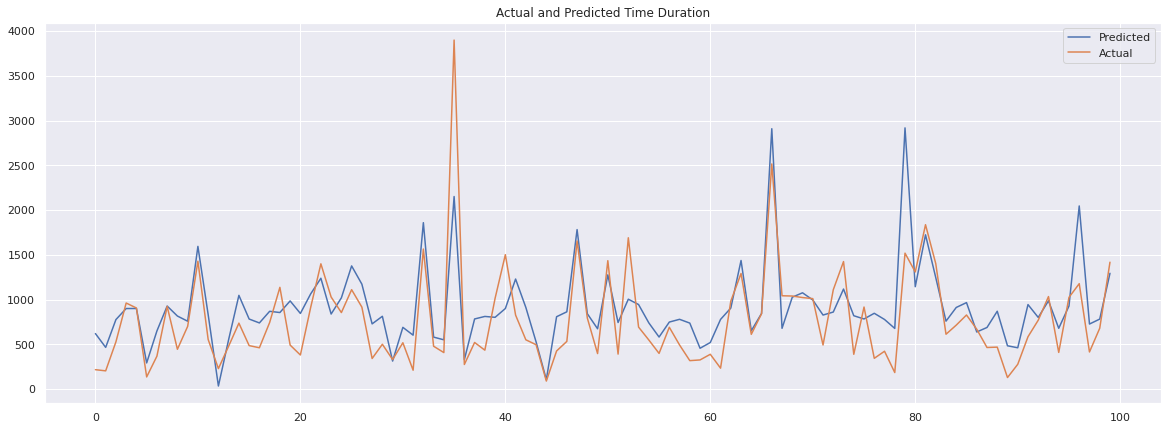

In [ ]:
# Plotting Actual and Predicted Values for test Feature selection
plt.figure(figsize=(20,7))
plt.plot((y_pred_fs)[:100]) 
plt.plot((np.array(y_test_fs)[:100]))
plt.legend(["Predicted","Actual"])
plt.title('Actual and Predicted Time Duration')

##### 3. Feature extraction

Text(0.5, 1.0, 'Actual and Predicted Time Duration')

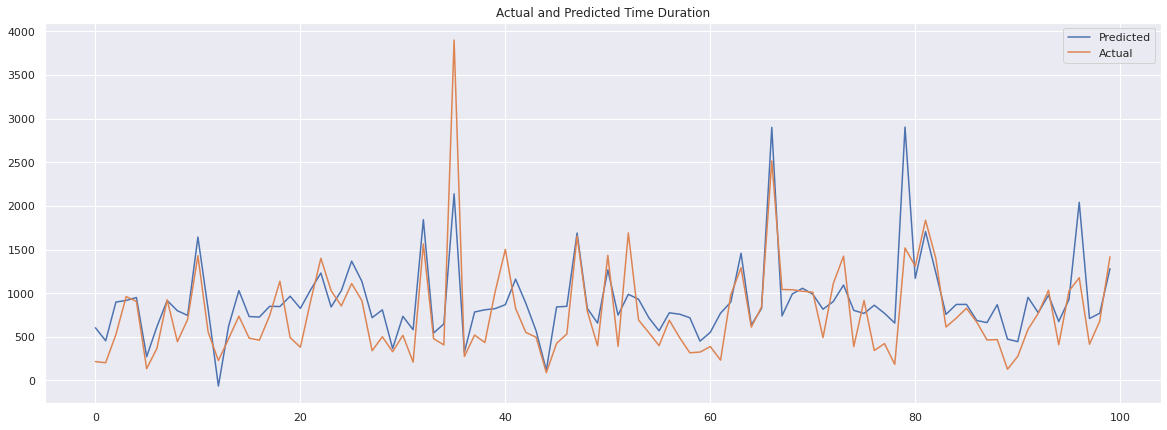

In [ ]:
# Plotting Actual and Predicted Values for test Feature extraction
plt.figure(figsize=(20,7))
plt.plot((y_pred_pca)[:100]) 
plt.plot((np.array(y_test_pca)[:100]))
plt.legend(["Predicted","Actual"])
plt.title('Actual and Predicted Time Duration')

#### From above 3 groups of data Evaluation & visualization matrix:-



*   We can see that Very poor Root mean squared value for both train and test data for 3 groups.

    For training raw data RMSE=5264.5866

    For training Feature Selection data RMSE=5264.9139

    For training Feature Extraction data RMSE=5292.9178

    For testing raw data RMSE=4923.1070

    For testing Feature Selection data RMSE=4923.0255

    For testing Feature Extraction data RMSE=4957.8020
*   We can see that very poor Adjusted R-squared value for both train and test data for 3 groups.

    For training raw data Adjusted R2 = 0.0140

    For training Feature Selection data Adjusted R2 = 0.0140

    For training Feature Extraction data Adjusted R2 = 0.0034

    For testing raw data Adjusted R2 = 0.0185

    For testing Feature Selection data Adjusted R2 = 0.0186

    For testing Feature Extraction data Adjusted R2 = 0.0046

Also we can see visualization graph their big difference between actual and predicted value




###  ML Model 2 - **Regularization Lasso Regression**

What is regularization:-

It is a techniques that are used to calibrate machine learning models in order to minimize the adjusted loss function and prevent overfitting or underfitting.

Here we use Lasso Regression:-

Lasso regression is a regularization technique. It is used over regression methods for a more accurate prediction. This model uses shrinkage. Shrinkage is where data values are shrunk towards a central point as the mean. The lasso procedure encourages simple, sparse models (i.e. models with fewer parameters).

#### Model fitting

In [ ]:
# Regularize Lasso Regression for the raw data
# Instance the Regularize Lasso Regression object
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)
# Fit the Algorithm
lasso.fit(X_train, y_train)

Lasso(alpha=0.0001, max_iter=3000)

In [ ]:
# Regularize Lasso Regression for the Feature selection data
# Instance the Regularize Lasso Regression object
lasso1  = Lasso(alpha=0.0001 , max_iter= 3000)
# Fit the Algorithm
lasso1.fit(X_train_fs, y_train_fs)

Lasso(alpha=0.0001, max_iter=3000)

In [ ]:
# Regularize Lasso Regression for the Feature extraction data
# Instance the Regularize Lasso Regression object
lasso2  = Lasso(alpha=0.0001 , max_iter= 3000)
# Fit the Algorithm
lasso2.fit(X_train_pca, y_train_pca)

Lasso(alpha=0.0001, max_iter=3000)

#### Coefficients

In [ ]:
# Checking the coefficients raw data
lasso.coef_

array([ 1.56092333e+02, -2.56442959e+01,  8.96267440e+00,  2.01242423e+02,
       -1.00335669e+01, -8.94603326e-02,  2.05568638e+01,  3.35495541e+01,
        5.28679528e+01,  9.58861431e+01,  7.91408825e+01,  9.30787971e+01,
        9.15705660e+01,  7.07360476e+01,  1.29328941e+01, -1.04883479e+01,
       -9.88151795e+00,  3.59696885e-01, -3.46927108e+01, -1.42901323e+02,
       -7.26068056e+01, -7.06677221e+01,  1.00521910e+01,  1.81473829e+01,
        1.69596124e+01,  2.02304333e+01,  6.51125201e+01,  6.11756917e+01,
        7.59513464e+01,  1.24122652e+02,  8.09713297e+01,  5.81456450e+01,
        5.24633144e+01, -2.48269835e+01, -5.06362007e+01, -5.27214813e+01,
        2.68100741e+01, -4.38638033e+01,  1.88838230e+01,  3.30435275e+01,
        7.48425122e+01,  1.79153273e+01,  3.52557515e+01])

In [ ]:
# Checking the coefficients Feature selection data
lasso1.coef_

array([   0.        ,  156.18823806,  -25.75123424,  206.26355937,
         30.64221115,   49.67630923,   91.02967119,   73.77890571,
         87.39598356,   85.79679266,   64.59475092, -169.20796027,
       -100.32954183,  -98.57814778,   35.40909251,   50.22895034,
         98.21589612,   55.34593217,  -50.68653319,  -76.23664502,
        -78.09344575,    1.80027665,  -68.59033334])

In [ ]:
# Checking the coefficients Feature extraction data
lasso2.coef_

array([ 141.22506046,   77.20492118,  -56.91573546,   15.31481962,
         10.84986301,  -20.41952828,  -31.0728251 ,   16.85439998,
         13.37242994,   -6.40196507,   -3.45075569,  -27.94733829,
         15.79023826,  -27.8192214 ,    9.43958986,   30.82554662,
        -30.58911763,   22.69919283,  -49.52859036,  -38.14441043,
         -2.3542311 ,   40.59498771,   -0.765796  ,  -12.91775658,
        -24.19505315,  -14.41953611,  -11.71940474,   46.86971468,
         20.26025245,   -3.46657024,   -2.54555965,   55.68743024,
         19.66436893,   -2.00843318,   69.40531908,  151.71163723,
        -39.74782398,  -50.44543536,   15.25210836, -755.2974243 ])

#### Cross validation & GridSearch CV

In [ ]:
# we use Cross validation with GridSearch CV technique to identify The best fit alpha value for model
# For raw data
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.1}

Using  {'alpha': 0.1}  the negative mean squared error is:  -20761071.829504877


In [ ]:
# we use Cross validation with GridSearch CV technique to identify The best fit alpha value for model
# For Feature selection data
lasso1 = Lasso()
parameters1 = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor1 = GridSearchCV(lasso1, parameters1, scoring='neg_mean_squared_error', cv=5)
lasso_regressor1.fit(X_train_fs, y_train_fs)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor1.best_params_)
print("\nUsing ",lasso_regressor1.best_params_, " the negative mean squared error is: ", lasso_regressor1.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-15}

Using  {'alpha': 1e-15}  the negative mean squared error is:  -20760569.028361056


In [ ]:
# we use Cross validation with GridSearch CV technique to identify The best fit alpha value for model
# For Feature extraction data
lasso2 = Lasso()
parameters2 = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor2 = GridSearchCV(lasso2, parameters2, scoring='neg_mean_squared_error', cv=5)
lasso_regressor2.fit(X_train_pca, y_train_pca)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor2.best_params_)
print("\nUsing ",lasso_regressor2.best_params_, " the negative mean squared error is: ", lasso_regressor2.best_score_)

The best fit alpha value is found out to be : {'alpha': 5}

Using  {'alpha': 5}  the negative mean squared error is:  -20761095.18192663


#### Prediction

In [ ]:
# Predict on the model test features of raw data
y_pred_lasso = lasso_regressor.predict(X_test)

In [ ]:
# Predict on the model test features of Feature selection data
y_pred_lasso1 = lasso_regressor1.predict(X_test_fs)

In [ ]:
# Predict on the model test features of Feature extraction data
y_pred_lasso2 = lasso_regressor2.predict(X_test_pca)

#### Evaluation metrics

In [ ]:
# Evaluation matrix for test raw data
MSE=round(mean_squared_error(y_test,y_pred_lasso),4)
RMSE=(np.sqrt(MSE))
R2=(r2_score(y_test,y_pred_lasso))
Adjusted_R2=(1-(1-r2_score(y_test, y_pred_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("MSE :",MSE,"RMSE :", RMSE)
print("R2 :",R2,"Adjusted R2 :",Adjusted_R2)

In [ ]:
# Evaluation matrix for test Feature selection data
MSE=round(mean_squared_error(y_test_fs,y_pred_lasso1),4)
RMSE=(np.sqrt(MSE))
R2=(r2_score(y_test_fs,y_pred_lasso1))
Adjusted_R2=(1-(1-r2_score(y_test_fs, y_pred_lasso1))*((X_test_fs.shape[0]-1)/(X_test_fs.shape[0]-X_test_fs.shape[1]-1)))
print("MSE :",MSE,"RMSE :", RMSE)
print("R2 :",R2,"Adjusted R2 :",Adjusted_R2)

In [ ]:
# Evaluation matrix for test Feature extraction data
MSE=round(mean_squared_error(y_test_pca,y_pred_lasso2),4)
RMSE=(np.sqrt(MSE))
R2=(r2_score(y_test_pca,y_pred_lasso2))
Adjusted_R2=(1-(1-r2_score(y_test_pca, y_pred_lasso2))*((X_test_pca.shape[0]-1)/(X_test_pca.shape[0]-X_test_pca.shape[1]-1)))
print("MSE :",MSE,"RMSE :", RMSE)
print("R2 :",R2,"Adjusted R2 :",Adjusted_R2)

#### Visualizing evaluation Metric Score chart

In [ ]:
# Plotting Actual and Predicted Values for test raw data
plt.figure(figsize=(20,7))
plt.plot((y_pred_lasso)[:100]) 
plt.plot((np.array(y_test)[:100]))
plt.legend(["Predicted","Actual"])
plt.title('Actual and Predicted Time Duration')

In [ ]:
# Plotting Actual and Predicted Values for test Feature selection data
plt.figure(figsize=(20,7))
plt.plot((y_pred_lasso1)[:100]) 
plt.plot((np.array(y_test_fs)[:100]))
plt.legend(["Predicted","Actual"])
plt.title('Actual and Predicted Time Duration')

In [ ]:
# Plotting Actual and Predicted Values for test Feature extraction data
plt.figure(figsize=(20,7))
plt.plot((y_pred_lasso2)[:100]) 
plt.plot((np.array(y_test_pca)[:100]))
plt.legend(["Predicted","Actual"])
plt.title('Actual and Predicted Time Duration')

### ML Model 3 - **Regularization Ridge Regression**

Here we use Ridge Regression:-

Ridge regression is a model tuning method that is used to analyse any data that suffers from multicollinearity. This method performs L2 regularization.

#### Model fitting

In [ ]:
# Regularize Ridge Regression for the Raw data
# Instance the Regularize Ridge Regression object
ridge  = Ridge(alpha=0.0001 , max_iter= 3000)
# Fit the Algorithm
ridge.fit(X_train, y_train)

Ridge(alpha=0.0001, max_iter=3000)

In [ ]:
# Regularize Ridge Regression for the Feature selection data
# Instance the Regularize Ridge Regression object
ridge1  = Ridge(alpha=0.0001 , max_iter= 3000)
# Fit the Algorithm
ridge1.fit(X_train_fs, y_train_fs)

Ridge(alpha=0.0001, max_iter=3000)

In [ ]:
# Regularize Ridge Regression for the Feature extraction data
# Instance the Regularize Ridge Regression object
ridge2  = Ridge(alpha=0.0001 , max_iter= 3000)
# Fit the Algorithm
ridge2.fit(X_train_pca, y_train_pca)

Ridge(alpha=0.0001, max_iter=3000)

#### Coefficients

In [ ]:
# Checking the coefficients raw data
ridge.coef_

array([ 159.82360985,  -25.6809764 ,   -1.25237458,  197.92702501,
          2.03395668,    6.78508692,   14.49114294,   33.78822181,
         49.12250786,   89.77983836,   75.91219927,   90.38955977,
         90.95153534,   78.06458139,   15.1471549 ,  -12.15059157,
          1.45660676,    0.77748675,  -55.03095505, -169.27876229,
        -71.96748483,  -63.05852916,   25.59437458,   23.58929843,
         34.07397909,   37.81919775,   74.18932462,   84.55429421,
        101.95394208,  125.79179261,   91.45001306,   59.27093462,
         54.50767734,  -17.61881636,  -44.76149231,  -40.88265163,
         55.11044376,  -43.68676185,  -37.20802106,  -35.50350953,
         -2.63529128,   20.95799097,  -16.59891224])

In [ ]:
# Checking the coefficients Feature selection data
ridge1.coef_

array([   0.        ,  159.82022606,  -25.79146244,  203.28501673,
         27.57165149,   42.61153149,   84.85181781,   70.54621038,
         84.59348108,   83.86723326,   69.52018464, -201.72379755,
       -106.15473156,  -97.7154852 ,   51.76930503,   69.15611373,
         92.79819794,   58.61997932,  -50.77390963,  -77.63340393,
        -73.7156402 ,   22.54257935,  -75.82997626])

In [ ]:
# Checking the coefficients Feature extraction data
ridge2.coef_

array([ 5.83654146e+01,  1.36288794e+02,  8.83724038e+01,  9.22772731e+00,
        2.74283659e+01, -1.00120746e+01, -2.06216886e+01, -2.28252453e+01,
       -1.14879251e+01,  1.68586878e+01,  1.55340521e+00,  1.65671758e+00,
       -1.99653695e+01, -3.20507604e+01, -1.49009743e+01, -6.33155430e+00,
        5.30903595e+01,  1.81646364e+01,  4.51026558e+01,  2.00990333e+01,
       -2.76151880e+00,  1.13668605e+01, -3.89759055e+00,  1.77933028e+00,
       -4.90065310e+00,  1.10504702e+00, -2.53084274e+01,  5.49773320e+01,
       -1.15617302e+01, -5.47622067e+00, -5.21901021e-01,  5.84825665e+01,
       -1.15157070e+01, -3.34867890e+00,  4.85033043e+01,  1.64020730e+02,
       -2.86051618e+01, -8.24301437e+01, -7.62211290e+02,  2.46146082e+00])

#### Cross validation & GridSearch CV

In [ ]:
# we use Cross validation with GridSearch CV technique to identify The best fit alpha value for model
# For raw data
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 100}

Using  {'alpha': 100}  the negative mean squared error is:  -27873146.050784696


In [ ]:
# we use Cross validation with GridSearch CV technique to identify The best fit alpha value for model
# For Feature selection data
ridge1 = Ridge()
parameters1 = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor1 = GridSearchCV(ridge1, parameters1, scoring='neg_mean_squared_error', cv=3)
ridge_regressor1.fit(X_train_fs,y_train_fs)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor1.best_params_)
print("\nUsing ",ridge_regressor1.best_params_, " the negative mean squared error is: ", ridge_regressor1.best_score_)

The best fit alpha value is found out to be : {'alpha': 100}

Using  {'alpha': 100}  the negative mean squared error is:  -27871536.71284379


In [ ]:
# we use Cross validation with GridSearch CV technique to identify The best fit alpha value for model
# For Feature extraction data
ridge2 = Ridge()
parameters2 = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor2 = GridSearchCV(ridge2, parameters2, scoring='neg_mean_squared_error', cv=3)
ridge_regressor2.fit(X_train_pca,y_train_pca)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor2.best_params_)
print("\nUsing ",ridge_regressor2.best_params_, " the negative mean squared error is: ", ridge_regressor2.best_score_)

The best fit alpha value is found out to be : {'alpha': 100}

Using  {'alpha': 100}  the negative mean squared error is:  -27873744.71823169


#### Prediction

In [ ]:
# Predict on the model test features of raw data
y_pred_ridge = ridge_regressor.predict(X_test)
y_pred_ridge

array([ 611.60505139,  463.93638133,  837.6075736 , ...,  728.62078648,
       1410.31593727, 1178.78400717])

In [ ]:
# Predict on the model test features of Feature selection data
y_pred_ridge1 = ridge_regressor1.predict(X_test_fs)
y_pred_ridge1

array([ 619.22992108,  465.01653343,  775.88758542, ...,  702.06979646,
       1382.18302687, 1194.50105556])

In [ ]:
# Predict on the model test features of Feature extraction data
y_pred_ridge2 = ridge_regressor2.predict(X_test_pca)
y_pred_ridge2

array([ 603.42038744,  454.57219019,  898.25842173, ...,  717.49715547,
       1378.75395478, 1174.30770205])

#### Evaluation metrics

In [ ]:
# Evaluation matrix for test raw data
MSE=round(mean_squared_error(y_test,y_pred_ridge),4)
RMSE=(np.sqrt(MSE))
R2=(r2_score(y_test,y_pred_ridge))
Adjusted_R2=(1-(1-r2_score(y_test, y_pred_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("MSE :",MSE,"RMSE :", RMSE)
print("R2 :",R2,"Adjusted R2 :",Adjusted_R2)

MSE : 24236929.3974 RMSE : 4923.101603400035
R2 : 0.018685604501103237 Adjusted R2 : 0.018540939814861268


In [ ]:
# Evaluation matrix for test Feature selection data
MSE=round(mean_squared_error(y_test_fs,y_pred_ridge1),4)
RMSE=(np.sqrt(MSE))
R2=(r2_score(y_test_fs,y_pred_ridge1))
Adjusted_R2=(1-(1-r2_score(y_test_fs, y_pred_ridge1))*((X_test_fs.shape[0]-1)/(X_test_fs.shape[0]-X_test_fs.shape[1]-1)))
print("MSE :",MSE,"RMSE :", RMSE)
print("R2 :",R2,"Adjusted R2 :",Adjusted_R2)

MSE : 24236171.5263 RMSE : 4923.0246319005955
R2 : 0.01871628948719284 Adjusted R2 : 0.018638918426217677


In [ ]:
# Evaluation matrix for test Feature extraction data
MSE=round(mean_squared_error(y_test_pca,y_pred_ridge2),4)
RMSE=(np.sqrt(MSE))
R2=(r2_score(y_test_pca,y_pred_ridge2))
Adjusted_R2=(1-(1-r2_score(y_test_pca, y_pred_ridge2))*((X_test_pca.shape[0]-1)/(X_test_pca.shape[0]-X_test_pca.shape[1]-1)))
print("MSE :",MSE,"RMSE :", RMSE)
print("R2 :",R2,"Adjusted R2 :",Adjusted_R2)

MSE : 24237218.0947 RMSE : 4923.130923985264
R2 : 0.01867391561114551 Adjusted R2 : 0.018539343591125745


#### Visualizing evaluation Metric Score chart

In [ ]:
# Plotting Actual and Predicted Values for test raw data
plt.figure(figsize=(20,7))
plt.plot((y_pred_ridge)[:100]) 
plt.plot((np.array(y_test)[:100]))
plt.legend(["Predicted","Actual"])
plt.title('Actual and Predicted Time Duration')

In [ ]:
# Plotting Actual and Predicted Values for test Feature selection data
plt.figure(figsize=(20,7))
plt.plot((y_pred_ridge1)[:100]) 
plt.plot((np.array(y_test_fs)[:100]))
plt.legend(["Predicted","Actual"])
plt.title('Actual and Predicted Time Duration')

In [ ]:
# Plotting Actual and Predicted Values for test Feature extraction data
plt.figure(figsize=(20,7))
plt.plot((y_pred_ridge2)[:100]) 
plt.plot((np.array(y_test_pca)[:100]))
plt.legend(["Predicted","Actual"])
plt.title('Actual and Predicted Time Duration')

### ML Model 4 - **Random Forest Regressor**

Why we use Random Forest Regressor:-

Random Forest Regression is a supervised learning algorithm that uses ensemble learning method for regression. Ensemble learning method is a technique that combines predictions from multiple machine learning algorithms to make a more accurate prediction than a single model.

#### Model fitting

In [ ]:
# Random Forest Regressor for the Raw data
# Instance the Random Forest Regressor object
rf_regression = RandomForestRegressor()
# Fit the Algorithm
rf_regression.fit(X_train, y_train)

In [ ]:
# Random Forest Regressor for the Raw data
# Instance the Random Forest Regressor object
rf_regression1 = RandomForestRegressor()
# Fit the Algorithm
rf_regression1.fit(X_train_fs, y_train_fs)

NameError: ignored

In [ ]:
# Random Forest Regressor for the Raw data
# Instance the Random Forest Regressor object
rf_regression2 = RandomForestRegressor()
# Fit the Algorithm
rf_regression2.fit(X_train_pca, y_train_pca)

#### Coefficients

In [ ]:
# Checking the coefficients raw data
rf_regression.coef_

In [ ]:
# Checking the coefficients Feature selection data
rf_regression1.coef_

In [ ]:
# Checking the coefficients Feature extraction data
rf_regression2.coef_

#### Predict

In [ ]:
# Predict on the model test features of raw data
y_pred_rf = rf_regression.predict(X_test)

In [ ]:
# Predict on the model test features of Feature selection data
y_pred_rf1 = rf_regression1.predict(X_test_fs)

In [ ]:
# Predict on the model test features of Feature extracion data
y_pred_rf2 = rf_regression2.predict(X_test_pca)

#### Evaluation metrics

In [ ]:
# Evaluation matrix for test raw data
MSE=round(mean_squared_error(y_test,y_pred_rf),4)
RMSE=(np.sqrt(MSE))
R2=(r2_score(y_test,y_pred_rf))
Adjusted_R2=(1-(1-r2_score(y_test, y_pred_rf))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("MSE :",MSE,"RMSE :", RMSE)
print("R2 :",R2,"Adjusted R2 :",Adjusted_R2)

In [ ]:
# Evaluation matrix for test Feature selection data
MSE=round(mean_squared_error(y_test_fs,y_pred_rf1),4)
RMSE=(np.sqrt(MSE))
R2=(r2_score(y_test_fs,y_pred_rf1))
Adjusted_R2=(1-(1-r2_score(y_test_fs, y_pred_rf1))*((X_test_fs.shape[0]-1)/(X_test_fs.shape[0]-X_test_fs.shape[1]-1)))
print("MSE :",MSE,"RMSE :", RMSE)
print("R2 :",R2,"Adjusted R2 :",Adjusted_R2)

In [ ]:
# Evaluation matrix for test Feature extraction data
MSE=round(mean_squared_error(y_test_pca,y_pred_rf2),4)
RMSE=(np.sqrt(MSE))
R2=(r2_score(y_test_pca,y_pred_rf2))
Adjusted_R2=(1-(1-r2_score(y_test_pca, y_pred_rf2))*((X_test_pca.shape[0]-1)/(X_test_pca.shape[0]-X_test_pca.shape[1]-1)))
print("MSE :",MSE,"RMSE :", RMSE)
print("R2 :",R2,"Adjusted R2 :",Adjusted_R2)

#### Visualizing evaluation Metric Score chart

In [ ]:
# Plotting Actual and Predicted Values for test raw data
plt.figure(figsize=(20,7))
plt.plot((y_pred_rf)[:100]) 
plt.plot((np.array(y_test)[:100]))
plt.legend(["Predicted","Actual"])
plt.title('Actual and Predicted Time Duration')

In [ ]:
# Plotting Actual and Predicted Values for test Feature selection data
plt.figure(figsize=(20,7))
plt.plot((y_pred_rf1)[:100]) 
plt.plot((np.array(y_test_fs)[:100]))
plt.legend(["Predicted","Actual"])
plt.title('Actual and Predicted Time Duration')

In [ ]:
# Plotting Actual and Predicted Values for test Feature extraction data
plt.figure(figsize=(20,7))
plt.plot((y_pred_rf2)[:100]) 
plt.plot((np.array(y_test_pca)[:100]))
plt.legend(["Predicted","Actual"])
plt.title('Actual and Predicted Time Duration')

### ML Model 5 - **XGBoost Regressor**

Why we use XGBoost Regressor:-

XGBoost (Extreme Gradient Boosting) is an optimized distributed gradient boosting library. It uses gradient boosting (GBM) framework at core. It belongs to a family of boosting algorithms that convert weak learners into strong learners. A weak learner is one which is slightly better than random guessing.

Boosting' here is a sequential process; i.e., trees are grown using the information from a previously grown tree one after the other. This process slowly learns from data and tries to improve its prediction in the subsequent iterations.

#### Model fitting

In [ ]:
# XGBoost Regressor for the Raw data
# Instance the XGBoost Regressor object
xgb_model = xgb.XGBRegressor()
# Fit the Algorithm
xgb_model.fit(X_train, y_train)

[15:50:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
# XGBoost Regressor for the Feature selection data
# Instance the XGBoost Regressor object
xgb_model1 = xgb.XGBRegressor()
# Fit the Algorithm
xgb_model1.fit(X_train_fs, y_train_fs)

[15:54:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
# XGBoost Regressor for the Feature extraction data
# Instance the XGBoost Regressor object
xgb_model2 = xgb.XGBRegressor()
# Fit the Algorithm
xgb_model2.fit(X_train_pca, y_train_pca)

#### Coefficients

In [ ]:
# Checking the coefficients raw data
xgb_model.coef_

In [ ]:
# Checking the coefficients Featutre selectoin data
xgb_model1.coef_

In [ ]:
# Checking the coefficients Feature extraction data
xgb_model2.coef_

#### Cross validation & GridSearch CV

In [ ]:
# Creating Hyperparameter Grid 
grid_values = {'n_estimators':[50, 80,  100], 'max_depth':[3, 5, 7]}


In [ ]:
xgb_grid = GridSearchCV(xgb_model, param_grid = grid_values, scoring = 'r2', cv=5)

In [ ]:
# Fit the Algorithm for raw data
xgb_grid.fit(X_train, y_train)

[15:57:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:59:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:00:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:02:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:05:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:07:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:10:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

GridSearchCV(cv=5, estimator=XGBRegressor(),
             param_grid={'max_depth': [3, 5, 7], 'min_samples_split': [40, 50],
                         'n_estimators': [50, 80, 100]},
             scoring='r2')

In [ ]:
# Fit the Algorithm for Feature selection data
xgb_grid.fit(X_train_fs, y_train_fs)

In [ ]:
# Fit the Algorithm for Feature extraction data
xgb_grid.fit(X_train_pca, y_train_pca)

#### Predict

In [ ]:
# Predict on the model test features of raw data
y_pred_xgb = xgb_grid.predict(X_test)
y_pred_xgb

array([ 438.40466,  927.2936 ,  410.54715, ..., 1263.97   , 1431.7784 ,
        437.9448 ], dtype=float32)

In [ ]:
# Predict on the model test features of Feature selection data
y_pred_xgb1 = xgb_grid.predict(X_test_fs)

In [ ]:
# Predict on the model test features of Feature extracion data
y_pred_xgb2 = xgb_grid.predict(X_test_pca)

#### Evaluation metrics

In [ ]:
# Evaluation matrix for test raw data
MSE=round(mean_squared_error(y_test,y_pred_xgb),4)
RMSE=(np.sqrt(MSE))
R2=(r2_score(y_test,y_pred_xgb))
Adjusted_R2=(1-(1-r2_score(y_test, y_pred_xgb))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("MSE :",MSE,"RMSE :", RMSE)
print("R2 :",R2,"Adjusted R2 :",Adjusted_R2)

MSE : 46553.4696 RMSE : 215.76253057470382
R2 : 0.9952565141871862 Adjusted R2 : 0.9952558149010092


In [ ]:
# Evaluation matrix for test Feature selection data
MSE=round(mean_squared_error(y_test_fs,y_pred_xgb1),4)
RMSE=(np.sqrt(MSE))
R2=(r2_score(y_test_fs,y_pred_xgb1))
Adjusted_R2=(1-(1-r2_score(y_test_fs, y_pred_xgb1))*((X_test_fs.shape[0]-1)/(X_test_fs.shape[0]-X_test_fs.shape[1]-1)))
print("MSE :",MSE,"RMSE :", RMSE)
print("R2 :",R2,"Adjusted R2 :",Adjusted_R2)

In [ ]:
# Evaluation matrix for test Feature extraction data
MSE=round(mean_squared_error(y_test_pca,y_pred_xgb2),4)
RMSE=(np.sqrt(MSE))
R2=(r2_score(y_test_pca,y_pred_xgb2))
Adjusted_R2=(1-(1-r2_score(y_test_pca, y_pred_xgb2))*((X_test_pca.shape[0]-1)/(X_test_pca.shape[0]-X_test_pca.shape[1]-1)))
print("MSE :",MSE,"RMSE :", RMSE)
print("R2 :",R2,"Adjusted R2 :",Adjusted_R2)

#### Visualizing evaluation Metric Score chart

In [ ]:
# Plotting Actual and Predicted Values for test raw data
plt.figure(figsize=(20,7))
plt.plot((y_pred_xgb)[:100]) 
plt.plot((np.array(y_test)[:100]))
plt.legend(["Predicted","Actual"])
plt.title('Actual and Predicted Time Duration')

In [ ]:
# Plotting Actual and Predicted Values for test Feature selection data
plt.figure(figsize=(20,7))
plt.plot((y_pred_xgb1)[:100]) 
plt.plot((np.array(y_test_fs)[:100]))
plt.legend(["Predicted","Actual"])
plt.title('Actual and Predicted Time Duration')

In [ ]:
# Plotting Actual and Predicted Values for test Feature extraction data
plt.figure(figsize=(20,7))
plt.plot((y_pred_xgb2)[:100]) 
plt.plot((np.array(y_test_pca)[:100]))
plt.legend(["Predicted","Actual"])
plt.title('Actual and Predicted Time Duration')

## **Conclusion**